In [1]:
from module.pianoRollExtractor import PianoRollExtractor

pre = PianoRollExtractor("select-midi/1238.midi")

In [2]:
import numpy as np

data = pre.get_piano_roll(start=2, end=22)
data = np.array([data])

print(data.shape)

(1, 480, 128)


In [3]:
from module.pianoRollGAN import GAN

model = GAN()

2024-02-08 14:25:20.898725: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-08 14:25:20.923821: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 14:25:20.923850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 14:25:20.924549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 14:25:20.928788: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 61440)             0         
                                                                 
 dense (Dense)               (None, 512)               31457792  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 31589377 (120.50 MB)
Trainable params: 315

In [4]:
model.train(100, data, batch_size=1)

1/1 [==============================] - 0s 99ms/step
(1, 480, 128)
0 [D loss: 0.663427, acc.: 100.00%] [G loss: 0.691676]
1/1 [==============================] - 0s 18ms/step
(1, 480, 128)
1 [D loss: 0.062856, acc.: 100.00%] [G loss: 0.668765]
1/1 [==============================] - 0s 18ms/step
(1, 480, 128)
2 [D loss: 0.004730, acc.: 100.00%] [G loss: 0.628195]
1/1 [==============================] - 0s 23ms/step
(1, 480, 128)
3 [D loss: 0.001867, acc.: 100.00%] [G loss: 0.570375]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
4 [D loss: 0.001219, acc.: 100.00%] [G loss: 0.492874]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
5 [D loss: 0.000954, acc.: 100.00%] [G loss: 0.395791]
1/1 [==============================] - 0s 18ms/step
(1, 480, 128)
6 [D loss: 0.000796, acc.: 100.00%] [G loss: 0.289602]
1/1 [==============================] - 0s 17ms/step
(1, 480, 128)
7 [D loss: 0.000683, acc.: 100.00%] [G loss: 0.191177]
1/1 [===========================

In [5]:
result = model.predict()
result = result.reshape(480, 128)
result = (result > 0.5)
result = result.astype(bool)

1/1 [==============================] - 0s 20ms/step


In [6]:
res_piano_roll = PianoRollExtractor(pianoRoll=result)


fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter '/home/Yukiche/.fluidsynth/default_sound_font.sf2' not a SoundFont or MIDI file or error occurred identifying it.


FluidSynth runtime version 2.3.4
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'result.wav'..


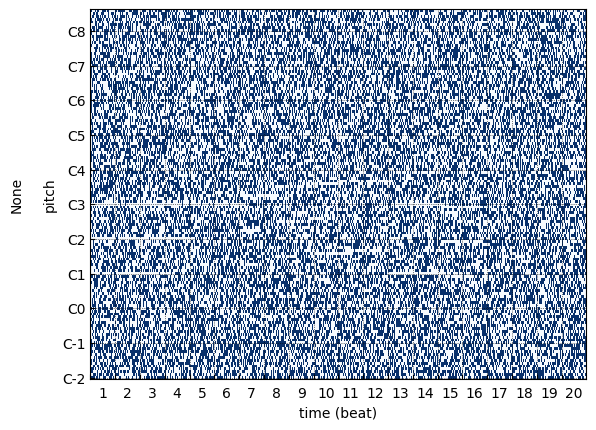

In [7]:
res_piano_roll.plot()

res_piano_roll.save_as_wav("result.wav")